<a href="https://colab.research.google.com/github/CristinaMarsh/Learning_/blob/Nothing/Pytorch_Step_by_Step_%7C_Chapter00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with PyTorch Step-by-Step: A Beginner's Guide

# Chapter 0

In [ ]:
try:
    import google.colab
    import requests
    url = 'https://raw.githubusercontent.com/dvgodoy/PyTorchStepByStep/master/config.py'
    r = requests.get(url, allow_redirects=True)
    open('config.py', 'wb').write(r.content)    
except ModuleNotFoundError:
    pass

from config import *
config_chapter0()
# This is needed to render the plots in this chapter
from plots.chapter0 import *

Finished!


In [ ]:
#Self Training
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Visualizing Gradient Descent

## Model

$$
\Large y = b + w x + \epsilon
$$

## Data Generation

### Synthetic Data Generation

In [ ]:
#Self Tranining
true_b = 1
true_w = 2
N = 100

#Random data generation 
np.random.seed(42)
x = np.random.rand(N,1)
epsilon = (.1 * np.random.randn(N,1))
y = true_b + true_w * x + epsilon

In [ ]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

### Train-Validation-Test Split

In [ ]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca6c726610>,
       dtype=object))

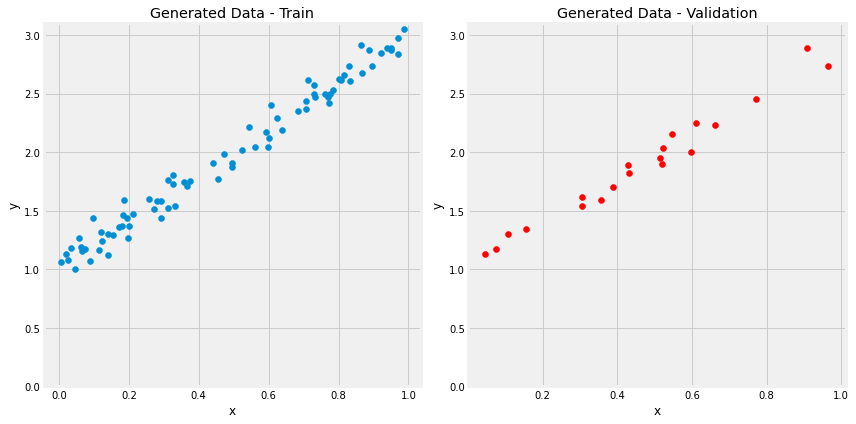

In [ ]:
figure1(x_train, y_train, x_val, y_val)

## Step 0: Random Initialization

For training a model, you need to randomly initialize the parameters/weights (we
have only two, b and w)

In [ ]:
# Self training

np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

(b,w)

(array([0.49671415]), array([-0.1382643]))

In [ ]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


## Step 1: Compute Model's Predictions

This is the forward pass - it simply computes the model’s predictions using the current
values of the parameters/weights. At the very beginning, we will be producing really
bad predictions, as we started with random values from Step 0.

In [ ]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fca69d80b50>)

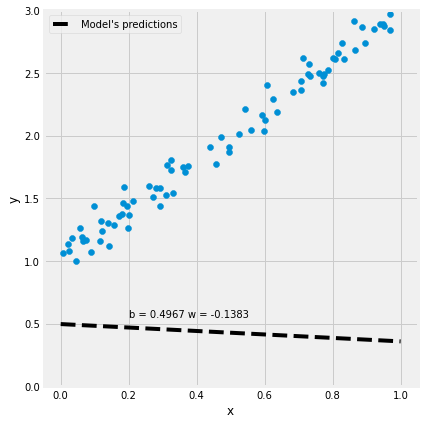

In [ ]:
figure2(x_train, y_train, b, w)

## Step 2: Compute the Loss

$$
\Large \text{error}_i = \hat{y_i} - y_i
$$

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fca69846710>)

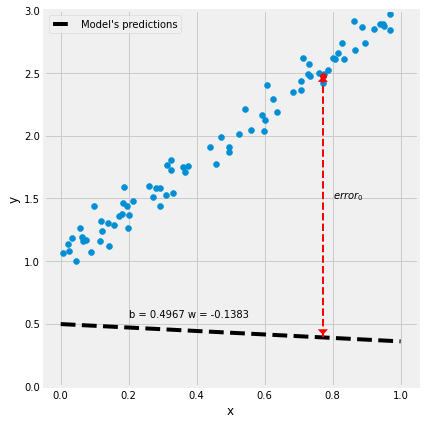

In [ ]:
figure3(x_train, y_train, b, w)

$$
\Large
\begin{aligned}
\text{MSE} &= \frac{1}{n} \sum_{i=1}^n{\text{error}_i}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(b + w x_i - y_i)}^2
\end{aligned}
$$

In [ ]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (yhat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
print(loss)

2.7421577700550976


### Loss Surface

In [ ]:
# Reminder:
# true_b = 1
# true_w = 2

# we have to split the ranges in 100 evenly spaced intervals each

b_range = np.linspace(true_b - 3, true_b + 3, 101)
w_range = np.linspace(true_w - 3, true_w + 3, 101)
# meshgrid is a handy function that generates a grid of b and w
# values for all combinations
bs, ws = np.meshgrid(b_range, w_range)
bs.shape, ws.shape

((101, 101), (101, 101))

In [ ]:
bs

array([[-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       ...,
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ]])

In [ ]:
sample_x = x_train[0]
#每一个栅格点就是误差的可能性
sample_yhat = bs + ws * sample_x
sample_yhat.shape

(101, 101)

In [ ]:
x_train.shape

(80, 1)

In [ ]:
#original
all_predictions = np.apply_along_axis(
    func1d=lambda x: bs + ws * x, 
    axis=1, 
    arr=x_train
)
all_predictions.shape


(80, 101, 101)

In [ ]:
all_predictions_motified = np.apply_along_axis(
    func1d=lambda x: bs + ws * x, 
    axis=-1, 
    arr=x_train
)
all_predictions_motified.shape #-1轴也是一样的，都是对每一列的值进行操作

(80, 101, 101)

In [ ]:
all_labels = y_train.reshape(-1, 1, 1)
all_labels.shape

(80, 1, 1)

In [ ]:
all_errors = (all_predictions - all_labels)
all_errors.shape

(80, 101, 101)

Each prediction has its own error, so we got 80 matrices of shape (101, 101), again,

每个点都有一系列误差
one matrix for each data point, each matrix containing a grid of errors.
The only step missing is to compute the mean squared error. First, we take the
square of all errors. Then we average the squares over all data points. Since our

data points are in the first dimension, we use axis=0 to compute this average:

In [ ]:
all_losses = (all_errors ** 2).mean(axis=0) #80个值上，每个值都有误差
all_losses.shape

(101, 101)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


(<Figure size 864x432 with 2 Axes>,
 (<matplotlib.axes._subplots.Axes3DSubplot at 0x7fca6981e850>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fca6919ffd0>))

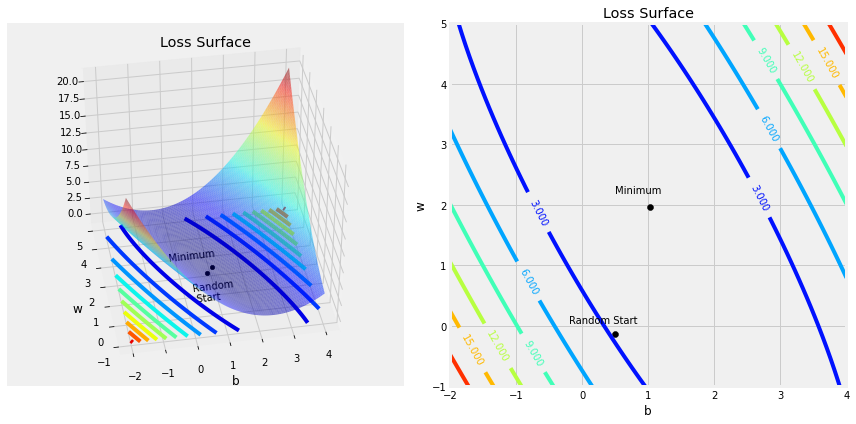

In [ ]:
figure4(x_train, y_train, b, w, bs, ws, all_losses)

### Cross Sections

What does this cross-section tell us? It tells us that, if we keep b constant (at 0.52),
the loss, seen from the perspective of parameter w, can be minimized if w gets
increased (up to some value between 2 and 3).


(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca68dfeb10>,
       dtype=object))

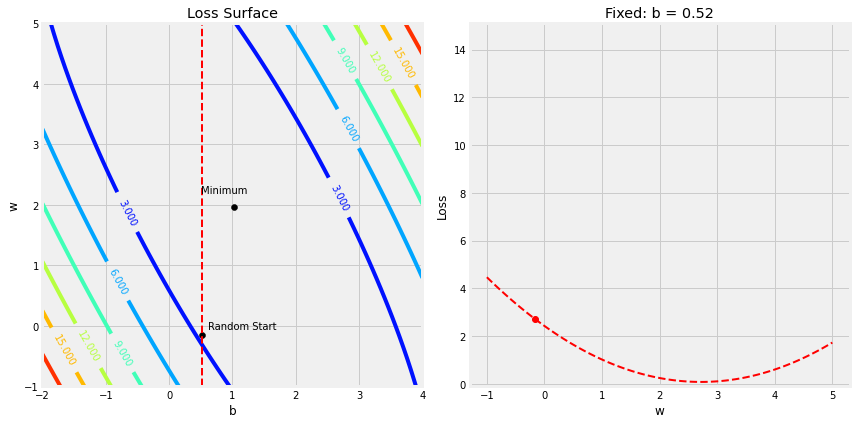

In [ ]:
figure5(x_train, y_train, b, w, bs, ws, all_losses)

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca6616c9d0>,
       dtype=object))

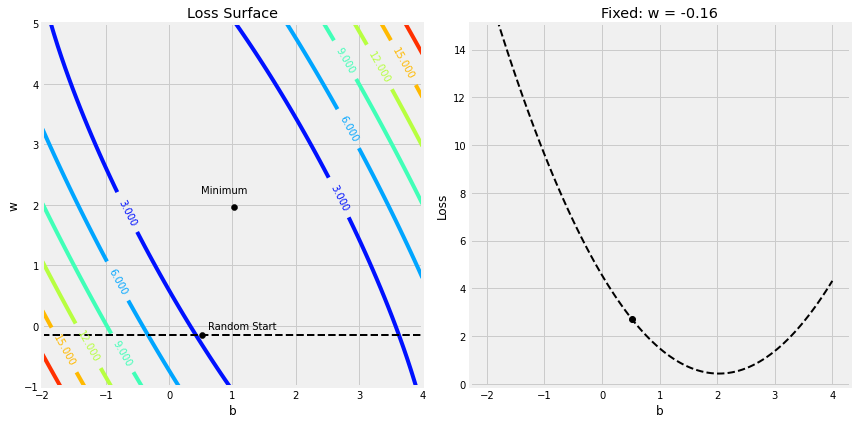

In [ ]:
#沿着随机点的坐标在取值
figure6(x_train, y_train, b, w, bs, ws, all_losses)

## Step 3: Compute the Gradients

Gradient = how much the loss changes if ONE parameter changes a little bit!

$$
\Large
\begin{aligned}
\frac{\partial{\text{MSE}}}{\partial{b}} = \frac{\partial{\text{MSE}}}{\partial{\hat{y_i}}} \frac{\partial{\hat{y_i}}}{\partial{b}} &= \frac{1}{n} \sum_{i=1}^n{2(b + w x_i - y_i)} 
\\
&= 2 \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}
\\
\frac{\partial{\text{MSE}}}{\partial{w}} = \frac{\partial{\text{MSE}}}{\partial{\hat{y_i}}} \frac{\partial{\hat{y_i}}}{\partial{w}} &= \frac{1}{n} \sum_{i=1}^n{2(b + w x_i - y_i) x_i} 
\\
&= 2 \frac{1}{n} \sum_{i=1}^n{x_i (\hat{y_i} - y_i)}
\end{aligned}
$$

In [ ]:
# Remind:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
#error = (yhat - y_train)

In [ ]:
error.shape

(80, 1)

In [ ]:
# Step 3 - Computes gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


### Visualizing the Gradients

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca661d9c90>,
       dtype=object))

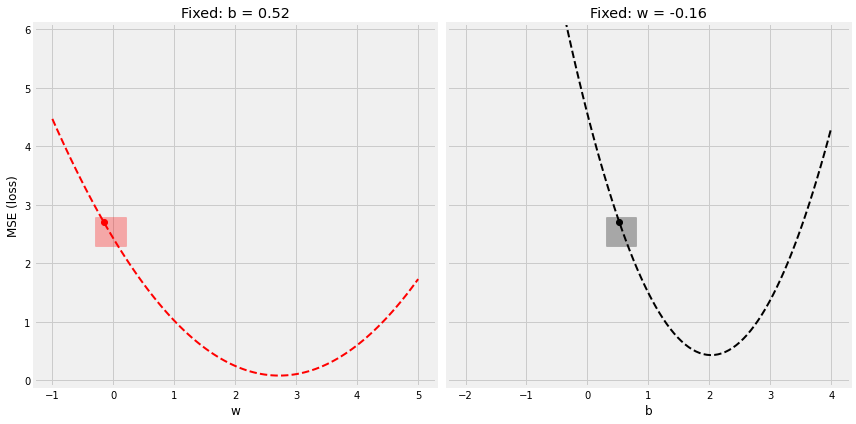

In [ ]:
figure7(b, w, bs, ws, all_losses)

The curve on the right is steeper. That’s your answer! Steeper curves have bigger gradients.
Cool! That’s the intuition… now, let’s get a bit more geometrical. So, I am zooming in the regions given by the red and black squares of Figure 0.7.
From the "Cross-Sections" section, we already know that to minimize the loss, both b and w needed to be increased. So, keeping the spirit of using gradients, let’s increase each parameter a little bit (always keeping the other one fixed!). By the way, in this example, a little bit equals 0.12 (for convenience sake, so it results in a
nicer plot)

What effect do these increases have on the loss? Let’s check it out:

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca660f4910>,
       dtype=object))

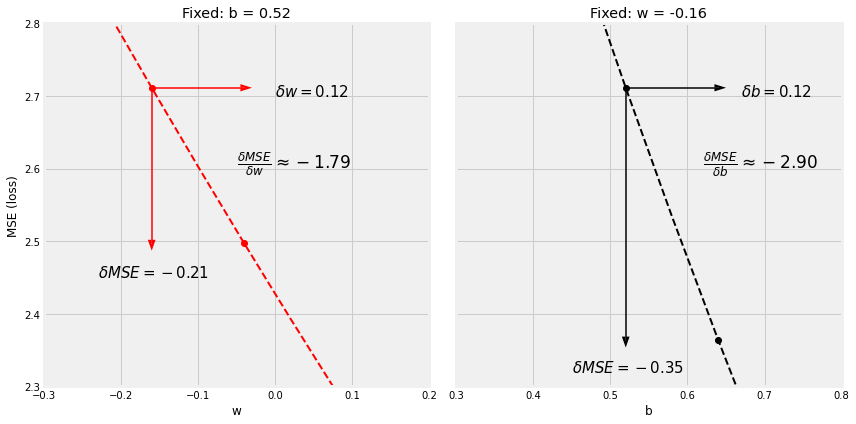

In [ ]:
figure8(b, w, bs, ws, all_losses)

On the left plot, increasing $w$ by $0.12$ yields a loss reduction of $0.21$. The geometrically computed and roughly approximate gradient is given by the ratio between the two values: $-1.79$. How does this result compare to the actual value of the gradient (-1.83)? It is actually not bad for a crude approximation... Could it be better? Sure, if we make the increase in w smaller and smaller (like $0.01$, instead of $0.12$ ), we'll get better and better approximations... in the limit, as the increase approaches zero, we'll arrive at the precise value of the gradient. Well, that's the definition of a derivative!


The same reasoning goes for the plot on the right: increasing $b$ by the same $0.12$ yields a bigger loss reduction of $0.35$. Bigger loss reduction, bigger ratio, bigger gradient - and bigger error, too, since the geometric approximation $(-2.90)$ is farther away from the actual value (-3.04).

Time for another question: which curve, red or black, you like best to reduce the loss? It should be the black one, right? Well, yes, but it is not as straightforward as we'd like it to be. We'll dig deeper into this in the "Learning Rate" section.

### Backpropagation

## Step 4: Update the Parameters

$$
\Large
\begin{aligned}
b &= b - \eta \frac{\partial{\text{MSE}}}{\partial{b}}
\\
w &= w - \eta \frac{\partial{\text{MSE}}}{\partial{w}}
\end{aligned}
$$

In [ ]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1
print(b, w)

# Step 4 - Updates parameters using gradients and the 
# learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fca65f98e50>)

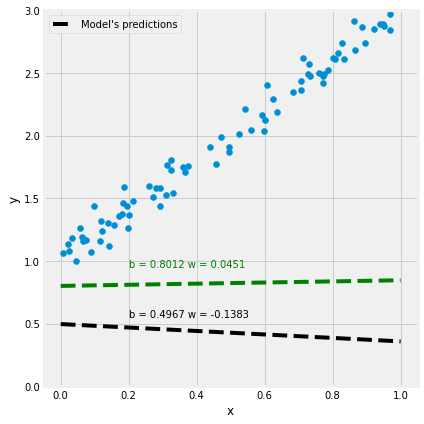

In [ ]:
figure9(x_train, y_train, b, w)

### Learning Rate

In [ ]:
manual_grad_b = -2.90
manual_grad_w = -1.79

np.random.seed(42)
b_initial = np.random.randn(1)
w_initial = np.random.randn(1)

#### Low Learning Rate

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca65f4f3d0>,
       dtype=object))

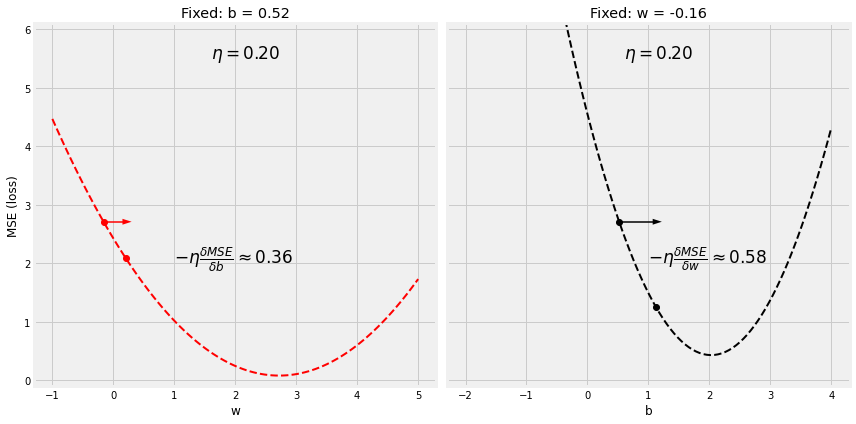

In [ ]:
# Learning rate - greek letter "eta" that looks like an "n"
lr = .2

figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

#### High Learning Rate

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca66201d50>,
       dtype=object))

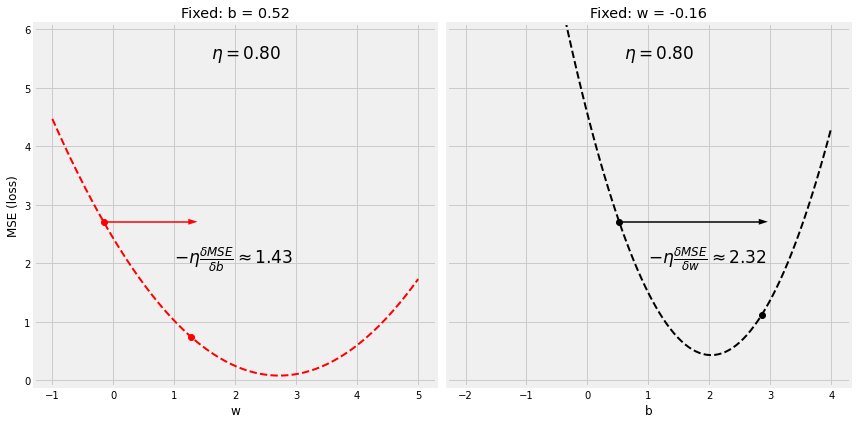

In [ ]:
# Learning rate - greek letter "eta" that looks like an "n"
lr = .8

figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

#### Very High Learning Rate

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca65e13c90>,
       dtype=object))

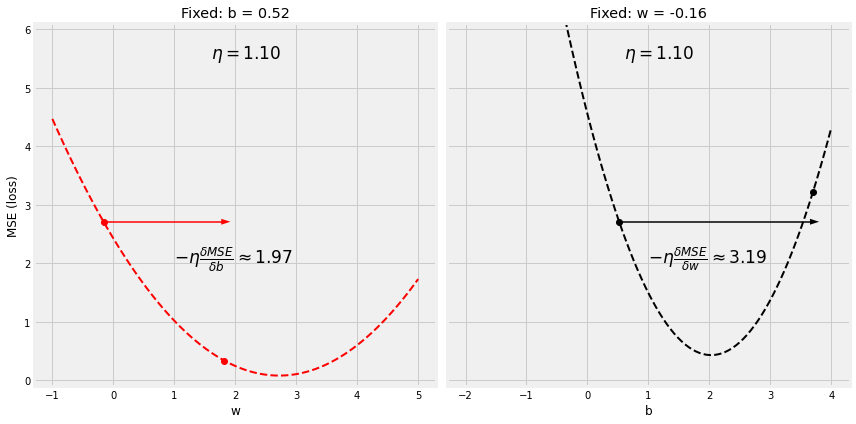

In [ ]:
# Learning rate - greek letter "eta" that looks like an "n"
lr = 1.1

figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

#### "Bad" Feature

In [ ]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)

# We divide w by 10
bad_w = true_w / 10
# And multiply x by 10
bad_x = np.random.rand(N, 1) * 10

# So, the net effect on y is zero - it is still
# the same as before
y = true_b + bad_w * bad_x + (.1 * np.random.randn(N, 1))

In [ ]:
# Generates train and validation sets
# It uses the same train_idx and val_idx as before,
# but it applies to bad_x
bad_x_train, y_train = bad_x[train_idx], y[train_idx]
bad_x_val, y_val = bad_x[val_idx], y[val_idx]

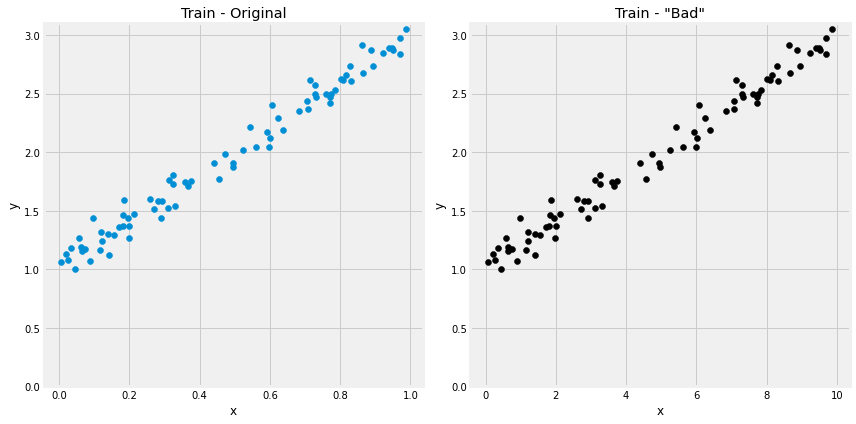

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(x_train, y_train)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim([0, 3.1])
ax[0].set_title('Train - Original')
ax[1].scatter(bad_x_train, y_train, c='k')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_ylim([0, 3.1])
ax[1].set_title('Train - "Bad"')
fig.tight_layout()

In [ ]:
# The ranges CHANGED because we are centering at the new minimum, using "bad" data
bad_b_range = np.linspace(-2, 4, 101)
bad_w_range = np.linspace(-2.8, 3.2, 101)
bad_bs, bad_ws = np.meshgrid(bad_b_range, bad_w_range)

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca65cf7c50>,
       dtype=object))

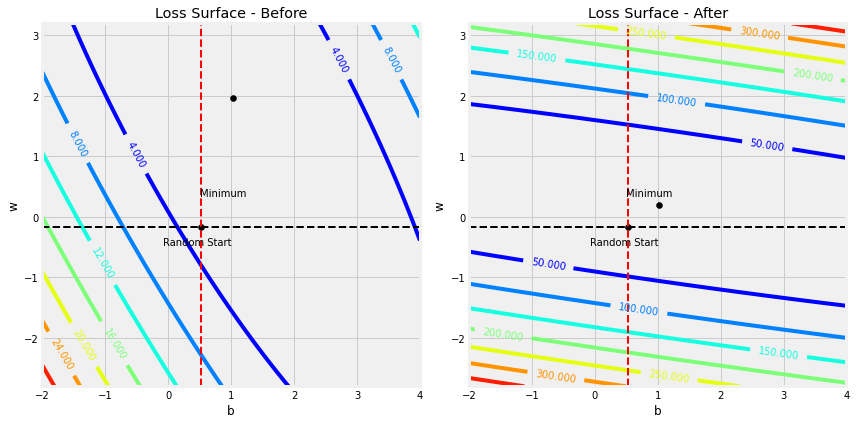

In [ ]:
figure14(x_train, y_train, b_initial, w_initial, bad_bs, bad_ws, bad_x_train)

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca65b48e50>,
       dtype=object))

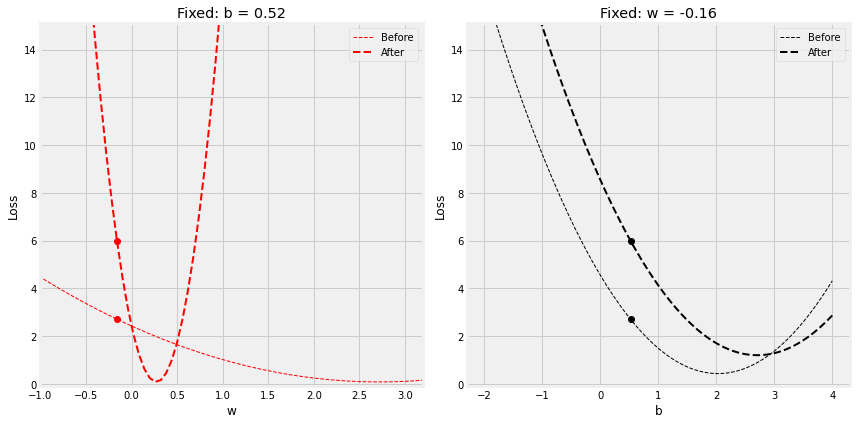

In [ ]:
figure15(x_train, y_train, b_initial, w_initial, bad_bs, bad_ws, bad_x_train)

#### Scaling / Standardizing / Normalizing

$$
\Large
\overline{X} = \frac{1}{N}\sum_{i=1}^N{x_i}
\\
\Large
\sigma(X) = \sqrt{\frac{1}{N}\sum_{i=1}^N{(x_i - \overline{X})^2}}
\\
\Large
\text{scaled } x_i=\frac{x_i-\overline{X}}{\sigma(X)}
$$

In [ ]:
scaler = StandardScaler(with_mean=True, with_std=True)
# We use the TRAIN set ONLY to fit the scaler
scaler.fit(x_train)

# Now we can use the already fit scaler to TRANSFORM
# both TRAIN and VALIDATION sets
scaled_x_train = scaler.transform(x_train)
scaled_x_val = scaler.transform(x_val)

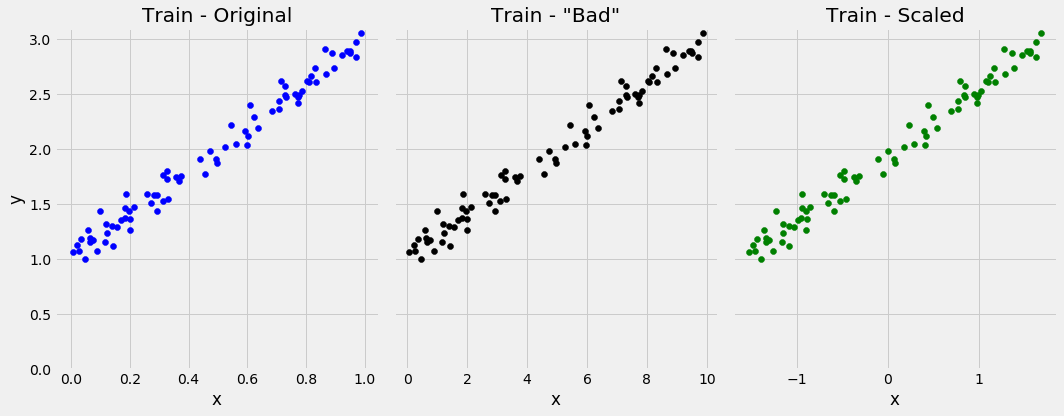

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax[0].scatter(x_train, y_train, c='b')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim([0, 3.1])
ax[0].set_title('Train - Original')
ax[1].scatter(bad_x_train, y_train, c='k')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_ylim([0, 3.1])
ax[1].set_title('Train - "Bad"')
ax[1].label_outer()
ax[2].scatter(scaled_x_train, y_train, c='g')
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')
ax[2].set_ylim([0, 3.1])
ax[2].set_title('Train - Scaled')
ax[2].label_outer()

fig.tight_layout()

In [ ]:
# The ranges CHANGED AGAIN because we are centering at the new minimum, using "scaled" data
scaled_b_range = np.linspace(-1, 5, 101)
scaled_w_range = np.linspace(-2.4, 3.6, 101)
scaled_bs, scaled_ws = np.meshgrid(scaled_b_range, scaled_w_range)

(<Figure size 1080x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca65a2ebd0>,
       dtype=object))

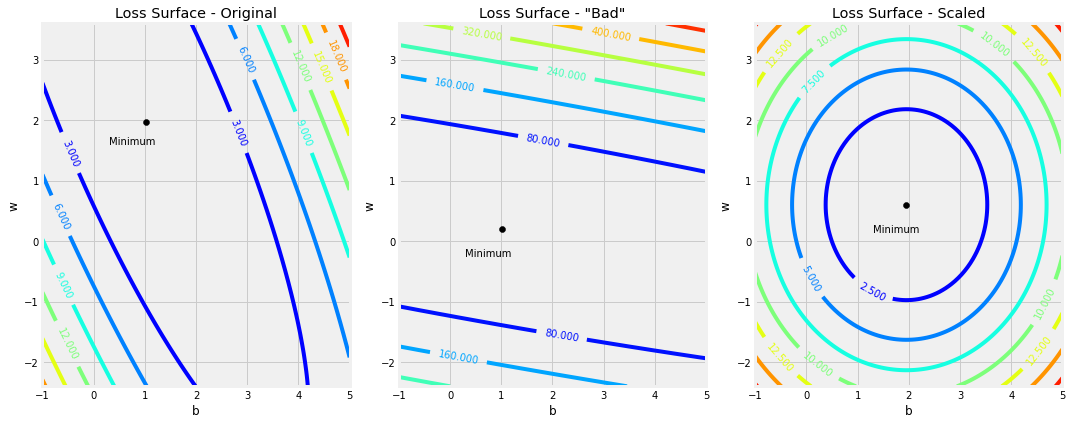

In [ ]:
figure17(x_train, y_train, scaled_bs, scaled_ws, bad_x_train, scaled_x_train)

## Step 5: Rinse and Repeat!


Definition of Epoch
An epoch is complete whenever every point in the training set (N) has already been used in all steps: forward pass, computing loss, computing gradients, and updating parameters.

During one epoch, we perform at least one update, but no more than $\mathbf{N}$ updates.

The number of updates $(\mathrm{N} / \mathrm{n})$ will depend on the type of gradient descent being used:
- for batch $(n=N)$ gradient descent, this is trivial, as it uses all points for computing the loss - one epoch is the same as one update
- for stochastic ( $n=1$ ) gradient descent, one epoch means $\mathbf{N}$ updates, since every individual data point is used to perform an update
- for mini-batch (of size $n$ ), one epoch has $\mathbf{N} / \mathbf{n}$ updates, since a mini-batch of $n$ data points is used to perform an update



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fca658ab1d0>)

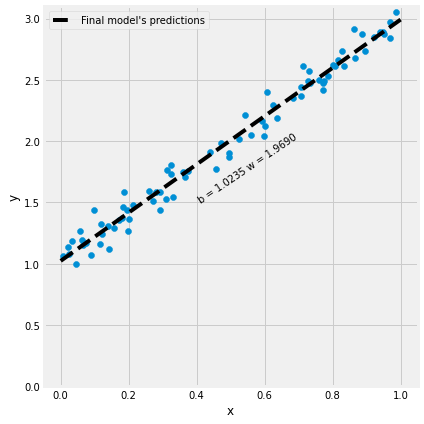

In [ ]:
figure18(x_train, y_train)

### The Path of Gradient Descent


The Path of Gradient Descent
In Step 3, we have seen the loss surface and both Random Start and Minimum points.

Which path is gradient descent going to take to go from random start to a minimum? How long will it take? Will it actually reach the minimum?

To illustrate the differences, I’ve generated paths over 100 epochs using either 80 data points (batch), 16 data points (mini-batch) or a single data point (stochastic) for computing the loss, as shown in the figure below:


You can see that the resulting parameters at the end of Epoch 1 differ greatly from one another. This is a direct consequence of the number of updates happening during one epoch, according to the batch size. In our example, for 100 epochs:

- 80 data points (batch): 1 update / epoch, totaling 100 updates
- 16 data points (mini-batch): 5 updates / epoch, totaling 500 updates
- 1 data point (stochastic): 80 updates / epoch, totaling $8.000$ updates

Even though the plots are important to illustrate the paths, the corresponding code is beyond the scope of this chapter.

![](https://github.com/dvgodoy/PyTorchStepByStep/blob/master/images/paths.png?raw=1)